In [1]:
import os
import pandas as pd
import pandas.api.types as ptypes
import numpy as np
import seaborn as sb
from matplotlib import pyplot as plt
from sklearn.preprocessing import Imputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import *
import pickle
import csv
from sklearn.metrics import accuracy_score

In [2]:
# Import dataset

dataset = pd.read_csv("bike_sharing.csv")

dataset.head() 

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [3]:
# check for describe
dataset.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [4]:
dataset.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [5]:
# check for info
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
instant       17379 non-null int64
dteday        17379 non-null object
season        17379 non-null int64
yr            17379 non-null int64
mnth          17379 non-null int64
hr            17379 non-null int64
holiday       17379 non-null int64
weekday       17379 non-null int64
workingday    17379 non-null int64
weathersit    17379 non-null int64
temp          17379 non-null float64
atemp         17379 non-null float64
hum           17379 non-null float64
windspeed     17379 non-null float64
casual        17379 non-null int64
registered    17379 non-null int64
cnt           17379 non-null int64
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [6]:
# check for num of rows and cols

print ('The train data has {0} rows and {1} columns'.format(dataset.shape[0],dataset.shape[1]))

The train data has 17379 rows and 17 columns


In [7]:
dataset = dataset.loc[:,['temp','cnt']]
dataset.dtypes

temp    float64
cnt       int64
dtype: object

In [8]:
# check for null 

dataset.isnull().sum()

temp    0
cnt     0
dtype: int64

In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 2 columns):
temp    17379 non-null float64
cnt     17379 non-null int64
dtypes: float64(1), int64(1)
memory usage: 271.6 KB


In [10]:
dataset.duplicated().sum()

7544

In [11]:
dataset.min()

temp    0.02
cnt     1.00
dtype: float64

In [12]:
# Handle Missing data
def handle_min_values(dataset):
    # replace min values by mean
    dataset.replace(0, dataset.mean(), inplace=True)
    return dataset

dataset = handle_min_values(dataset)

In [13]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 2 columns):
temp    17379 non-null float64
cnt     17379 non-null int64
dtypes: float64(1), int64(1)
memory usage: 271.6 KB


In [14]:
os.mkdir("CSV")

FileExistsError: [Errno 17] File exists: 'CSV'

In [15]:
def splitdata(dataset):
    # split train and test data
    train, test = train_test_split(dataset,test_size = 0.35, random_state=0)
    print("train : ", train.shape, " test : ", test.shape)
    #     print("y_train : ", y_train.shape, " y_test : ", y_test.shape)
    
    # saving datasets into csv files
    test.to_csv('CSV/test_file.csv',index=False,encoding='utf-8')
    
    
    # divide train data into train and cross validation 
    train_data, crossV_data = train_test_split(train,test_size = 0.40,random_state=0)
    
    train_data.to_csv('CSV/train_file.csv',index=False,encoding='utf-8')
    crossV_data.to_csv('CSV/crossV_file.csv',index=False,encoding='utf-8')
   
    
    
    print("train_data : ", train_data.shape, " crossV_data : ", crossV_data.shape)
    
    #     return x_train_data, x_cv, y_train_data, y_cv 

splitdata(dataset)

train :  (11296, 2)  test :  (6083, 2)
train_data :  (6777, 2)  crossV_data :  (4519, 2)


In [16]:
dataset1 = pd.read_csv("CSV/train_file.csv")

dataset1.shape

(6777, 2)

In [17]:
x =dataset1.iloc[:,:-1].values
y =dataset1.iloc[:,1].values

In [18]:
print("x_train shape",x.shape)
print("y_train shape",y.shape)

x_train shape (6777, 1)
y_train shape (6777,)


Regressor :  LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)
prediction of y train data :  [307.39305742 226.10874454 233.49822753 ... 166.99288062 107.8770167
 270.44564248]

 Accuracy train data acc_r2 :
  84.61468055276198

 Accuracy train data median_ab_error : 
 99.449187421327


 ------------visualising the training set results:----------- 


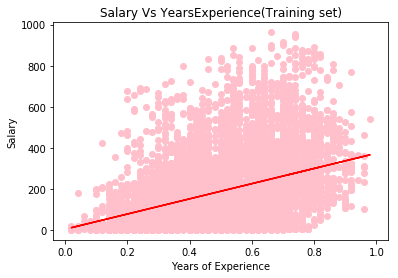

pickel file create


In [24]:
class Simple_Linear_regression:
    
    # fitting sample linear regresion to the training set
    
    def model_train(self,x,y):  
        regressor = LinearRegression()
        regressor.fit(x,y)
        return regressor
    
    
    
    # predicting the test set result and train set result
    
    def prediction(self,x,regressor):
    
        y_pred_train = regressor.predict(x)
        return y_pred_train

    # Accuracy for train and test
    
    def accuracy(self,y,y_pred_train):
        
#         # Accuracy = r2_score(y,y_pred_train)*100
#         error = r2_score(y,y_pred_train)*100 # 15
#         Accuracy = (1 -error) * 100
#         print("Accuracy of r2_score : ", Accuracy)

        
#         Accuracy1 = explained_variance_score(y_pred_train,y)# -4
#         print("Accuracy of explained_variance_score :", Accuracy1)

#         Accuracy2 = explained_variance_score(y,y_pred_train) # 0
#         print("Accuracy of explained_variance_score : ", Accuracy2)
        
#         error = mean_absolute_error(y, y_pred_train) # 125
#         Accuracy3 = (1 -error) * 100
#         print("Accuracy of mean_absolute_error :", Accuracy3)
        
#         Accuracy4 = mean_squared_error(y, y_pred_train) # 27709.06811979052
#         print("Accuracy of mean_squared_error :", Accuracy4)
        
#         Accuracy5 = mean_squared_log_error(y, y_pred_train) # 2
#         print("Accuracy of mean_squared_log_error :", Accuracy5)



#         Accuracy6 = median_absolute_error(y, y_pred_train)
#         print("Accuracy of median_absolute_error : ", Accuracy6)
        # acc using r2
        error = r2_score(y, y_pred_train)      
        acc_r2 = (1-error)*100
       
        # using median_ab_error
        median_ab_error = median_absolute_error(y, y_pred_train)
        return acc_r2, median_ab_error

        


    
    # visualising the training set results
    
    def plotting(self,x, y,regressor):
        
        plt.scatter(x, y , color = 'pink')
        plt.plot(x, regressor.predict(x), color = 'red')
        plt.title("Salary Vs YearsExperience(Training set)")
        plt.xlabel("Years of Experience")
        plt.ylabel("Salary")
        plt.show()
        
        
    # dump train model pickle file
    
    def pickel_file(self,regressor):
        
       
        file = open('trainmodel.pkl', 'wb')
        pickle.dump(regressor,file)
        file.close()
        
def main(dataset1,x,y):
    
    object_SimpleLR = Simple_Linear_regression()
    
    regressor = object_SimpleLR.model_train(x,y)
    print("Regressor : ", regressor)
    
    y_pred_train = object_SimpleLR.prediction(x,regressor)
    print("prediction of y train data : ",y_pred_train)
    
    acc_r2, median_ab_error = object_SimpleLR.accuracy(y,y_pred_train)
    print("\n Accuracy train data acc_r2 :\n ", acc_r2)
    print("\n Accuracy train data median_ab_error : \n",  median_ab_error)
    
    print()
    print("\n ------------visualising the training set results:----------- ")
    object_SimpleLR.plotting(x,y,regressor)
    
    object_SimpleLR.pickel_file(regressor)
    print("pickel file create")
    
    
    
    
    
main(dataset1,x,y)
    
